# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=600)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)
url = "http://api.openweathermap.org/data/2.5/weather?q="



['hambantota', 'meadow lake', 'barentsburg', 'neosho', 'amahai', 'taolanaro', 'manbij', 'mugur-aksy', 'aswan', 'leningradskiy', 'mataura', 'vaini', 'puerto ayora', 'pathein', 'yeroham', 'albany', 'asau', 'busselton', 'new norfolk', 'tiksi', 'sinnamary', 'saint-philippe', 'hobart', 'punta arenas', 'rikitea', 'narsaq', 'kurtamysh', 'nanortalik', 'karratha', 'severnyy-kospashskiy', 'east london', 'cabo san lucas', 'valiug', 'sur', 'yellowknife', 'vila franca do campo', 'lompoc', 'sao filipe', 'yertsevo', 'tsienyane', 'khasan', 'cape town', 'denpasar', 'talnakh', 'khatanga', 'bluff', 'arraial do cabo', 'kondopoga', 'georgetown', 'cherskiy', 'tazovskiy', 'hermanus', 'canto do buriti', 'ushuaia', 'mareeba', 'thompson', 'san patricio', 'ambunti', 'bredasdorp', 'port alfred', 'victoria', 'port blair', 'ribeira grande', 'linjiang', 'killybegs', 'jamestown', 'provideniya', 'puerto carreno', 'saskylakh', 'flinders', 'beringovskiy', 'lavrentiya', 'havoysund', 'avera', 'yeppoon', 'tomatlan', 'paso 

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["Cities"]
cities_df["Country"] = ""
cities_df["Max_Temp"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Humidity_(%)"] = ""
cities_df["Cloudiness_(%)"] = ""
cities_df["Wind_Speed_(mph)"] = ""
cities_df.head()


,Cities,Country,Max_Temp,Latitude,Longitude,Humidity_(%),Cloudiness_(%),Wind_Speed_(mph)
0,hambantota,,,,,,,
1,meadow lake,,,,,,,
2,barentsburg,,,,,,,
3,neosho,,,,,,,
4,amahai,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Processing Record 1 of Set 1 | lompoc

print("Beginning Data Retrieval")
print("---------------------------")
for index, row in cities_df.iterrows():
    city_data = row["Cities"]
    weather_url = requests.get(f"{url}{city_data}&APPID={api_key}")
    response = weather_url.json()
    
    if response["cod"] == "404":
        print("City not found. Skipping...")
    
    else:
        print(f"Weather data for {city_data} is being retreived.")
        cities_df.loc[index, "Cities"] = response["name"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Max_Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Humidity_(%)"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness_(%)"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind_Speed_(mph)"] = response["wind"]["speed"]


Beginning Data Retrieval
---------------------------
Weather data for hambantota is being retreived.
Weather data for meadow lake is being retreived.
City not found. Skipping...
Weather data for neosho is being retreived.
Weather data for amahai is being retreived.
City not found. Skipping...
Weather data for manbij is being retreived.
Weather data for mugur-aksy is being retreived.
Weather data for aswan is being retreived.
Weather data for leningradskiy is being retreived.
Weather data for mataura is being retreived.
Weather data for vaini is being retreived.
Weather data for puerto ayora is being retreived.
Weather data for pathein is being retreived.
Weather data for yeroham is being retreived.
Weather data for albany is being retreived.
City not found. Skipping...
Weather data for busselton is being retreived.
Weather data for new norfolk is being retreived.
Weather data for tiksi is being retreived.
Weather data for sinnamary is being retreived.
Weather data for saint-philippe is

Weather data for lengshuijiang is being retreived.
Weather data for summerland is being retreived.
Weather data for lubu is being retreived.
Weather data for taoudenni is being retreived.
Weather data for tuktoyaktuk is being retreived.
Weather data for ishinomaki is being retreived.
City not found. Skipping...
Weather data for mogadishu is being retreived.
Weather data for los llanos de aridane is being retreived.
Weather data for vagur is being retreived.
City not found. Skipping...
Weather data for quatre cocos is being retreived.
Weather data for tuatapere is being retreived.
City not found. Skipping...
Weather data for pochutla is being retreived.
Weather data for zhigansk is being retreived.
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Weather data for hofn is being retreived.
Weather data for castro is being retreived.
Weather data for vardo is being retreived.
Weather data for saldanha is being retreived.
Weathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df["Max_Temp"].replace('', np.nan, inplace=True)
clean_cities_df = cities_df.dropna()
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,Cities,Country,Max_Temp,Latitude,Longitude,Humidity_(%),Cloudiness_(%),Wind_Speed_(mph)
0,Hambantota,LK,305.150,6.12,81.12,79,40,5.7
1,Meadow Lake,CA,272.068,54.13,-108.44,95,31,2.03
2,Neosho,US,280.150,43.31,-88.52,65,90,4.6
3,Amahai,ID,301.168,-3.31,129,75,100,4.83
4,Manbij,SY,295.370,36.53,37.96,53,40,1.5


In [6]:
clean_cities_df.isnull().sum()

Cities              0
Country             0
Max_Temp            0
Latitude            0
Longitude           0
Humidity_(%)        0
Cloudiness_(%)      0
Wind_Speed_(mph)    0
dtype: int64

In [7]:
clean_cities_df.to_csv("WeatherPy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

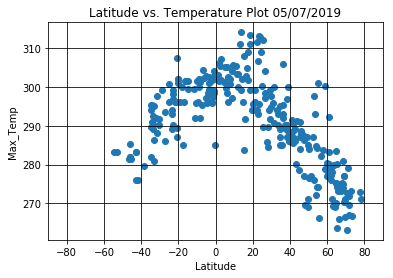

In [8]:

plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Max_Temp"], alpha=1, label="City", linewidths=1, cmap="plasma")
plt.title(f"Latitude vs. Temperature Plot {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max_Temp")
plt.xlabel("Latitude")
plt.xlim(lat_range)
plt.grid(True, color="black")
plt.savefig("api_export/Latitude_Temperature.png")
plt.show


#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

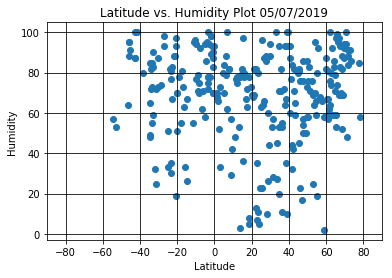

In [9]:
plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Humidity_(%)"], alpha=1, label="City", linewidths=1, cmap="plasma")
plt.title(f"Latitude vs. Humidity Plot {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.xlim(lat_range)
plt.grid(True, color="black")
plt.savefig("api_export/Latitude_Humidity.png")
plt.show


#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

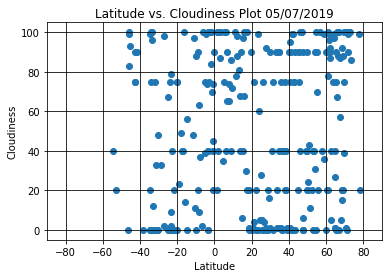

In [10]:
plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Cloudiness_(%)"], alpha=1, label="City", linewidths=1, cmap="plasma")
plt.title(f"Latitude vs. Cloudiness Plot {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.xlim(lat_range)
plt.grid(True, color="black")
plt.savefig("api_export/Latitude_Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

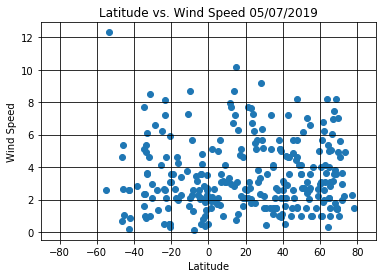

In [11]:
plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Wind_Speed_(mph)"], alpha=1, label="City", linewidths=1, cmap="plasma")
plt.title(f"Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.xlim(lat_range)
plt.grid(True, color="black")
plt.savefig("api_export/Latitude_WindSpeed.png")
plt.show